In [ ]:
!git clone 'https://github.com/LuchnikovI/ML-meets-quantum-physics-QIT-lab-seminar'
%cd 'ML-meets-quantum-physics-QIT-lab-seminar/Seminar 1, Recurrent Neural Network Wave Functions'

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from rnn_wavefunction import RNNWaveFunction as psi

In [ ]:
# RNN wavefunction training

#----------------------Parameters-----------------------#
num_of_particels = 32  # number of particles
cell = tf.keras.layers.GRUCell(64)  # rnn cell
# FFNN
#=============================================#
inp = tf.keras.Input((64,))
out = tf.keras.layers.Dense(4)(inp)
ffnn = tf.keras.Model(inputs=inp, outputs=out)
#=============================================#
lr_in = 0.005  # initial learning rate
lr_f = 0.0001  # final learning rate
num_of_samples = 1024  # number of samples
num_of_iters = 3000  # number of iterations
#-------------------------------------------------------#
wf = psi(cell, ffnn, num_of_particels, 2)

# connections
c = tf.range(num_of_particels)[:, tf.newaxis]
c = tf.concat([c, tf.roll(c, axis=0, shift=1)], axis=1)[1:]

# amplitudes of connections
ampl = tf.concat([tf.zeros((num_of_particels-1, 2), dtype=tf.complex64),
                  tf.ones((num_of_particels-1, 1), dtype=tf.complex64)], axis=-1)

# local fields
fields = tf.concat([tf.ones((num_of_particels, 1), dtype=tf.complex64),
                  tf.zeros((num_of_particels, 2), dtype=tf.complex64)], axis=-1)

# optimizer
decay_rate = (lr_f / lr_in) ** (1 / num_of_iters)
schedule = tf.keras.optimizers.schedules.ExponentialDecay(lr_in,
                                                          num_of_iters,
                                                          decay_rate)
opt = tf.optimizers.Adam(schedule)

E = wf.train(num_of_samples,
             num_of_iters,
             opt,
             c,
             ampl,
             fields)

tf.Tensor(-1.2614764, shape=(), dtype=float32)
-1.2620097862880861


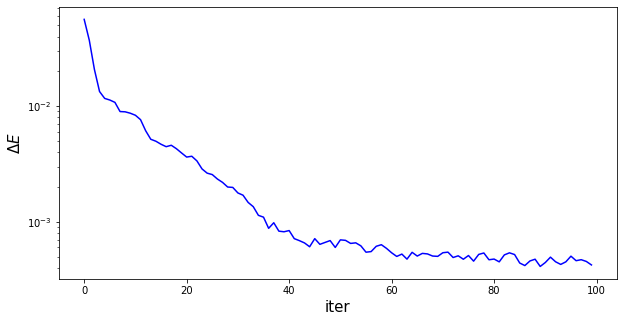

In [20]:
# dmrg based value of energy in the critical point
E0_exact_fin = -1.2620097862880861

# plotting of energy vs iter
E = tf.reshape(E, (-1, 100))
E = tf.reduce_mean(E, axis=0)
plt.figure(figsize=(10, 5))
plt.plot((E / num_of_particels - E0_exact_fin) / -E0_exact_fin, 'b')
plt.yscale('log')
plt.xlabel('iter', fontsize=15)
plt.ylabel(r'$\Delta E$', fontsize=15)
print((E / num_of_particels)[-1])
print(E0_exact_fin)

In [ ]:
# corr. functions calculation
corr_functions = []
for i in range(1, num_of_particels):
    corr_functions.append(wf.correlator(0, i, 100))
corr_functions = tf.convert_to_tensor(corr_functions)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, '$i$')

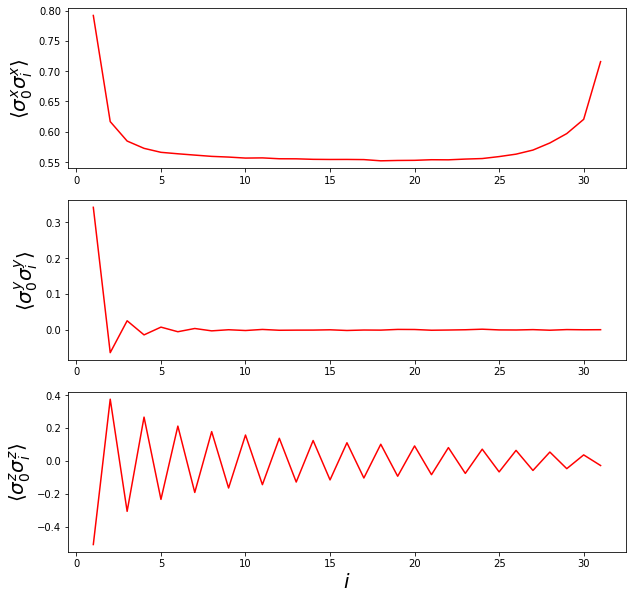

In [ ]:
# plotting of corr. function
plt.figure(figsize=(10, 10))
plt.subplot(311)
plt.plot(tf.range(1, num_of_particels), corr_functions[:, 0], 'r')
plt.ylabel(r'$\langle\sigma^x_0\sigma^x_i\rangle$', fontsize=20)
plt.subplot(312)
plt.ylabel(r'$\langle\sigma^y_0\sigma^y_i\rangle$', fontsize=20)
plt.plot(tf.range(1, num_of_particels), corr_functions[:, 1], 'r')
plt.subplot(313)
plt.plot(tf.range(1, num_of_particels), corr_functions[:, 2], 'r')
plt.ylabel(r'$\langle\sigma^z_0\sigma^z_i\rangle$', fontsize=20)
plt.xlabel(r'$i$', fontsize=20)